<a href="https://colab.research.google.com/github/Nivedhaponlakshmi/Stock-Price-Prediction/blob/main/Nivedha_pds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("AAPL.csv")
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  29-09-2014  100.589996  100.690002   98.040001   99.620003   93.514290   
1  06-10-2014   99.949997  102.379997   98.309998  100.730003   94.556244   
2  13-10-2014  101.330002  101.779999   95.180000   97.669998   91.683792   
3  20-10-2014   98.320000  105.489998   98.220001  105.220001   98.771042   
4  27-10-2014  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600  


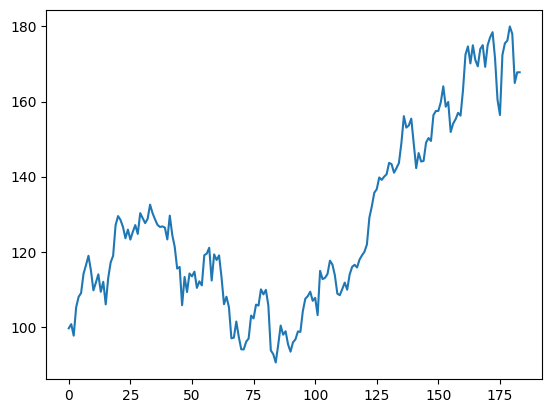

In [ ]:
import matplotlib.pyplot as plt
#%matplotlib inline
#plt.figure(figsize=(16,8))
plt.plot(df['Close'])

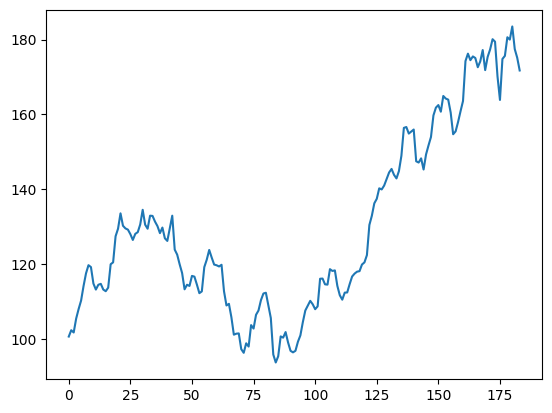

In [ ]:
plt.plot(df['High'])

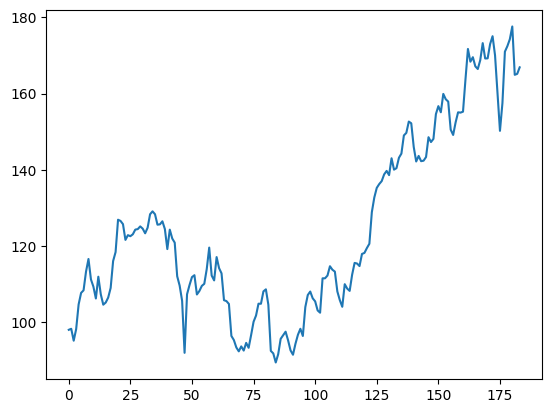

In [ ]:
plt.plot(df['Low'])

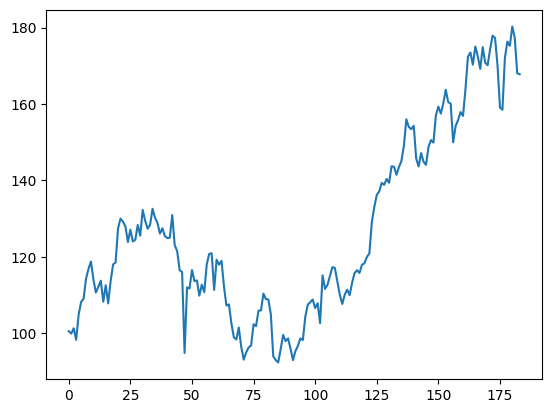

In [ ]:
plt.plot(df['Open'])

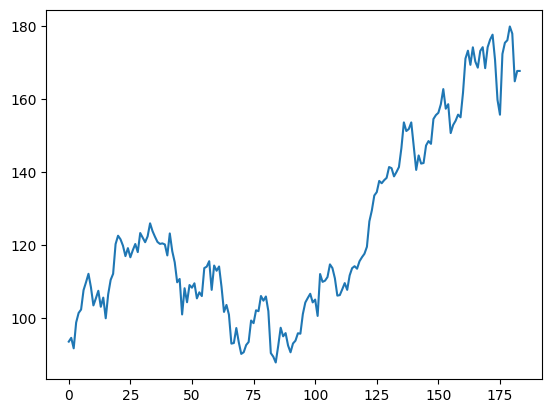

In [ ]:
plt.plot(df['Adj Close'])

In [ ]:
df['Open-Close']=df['Open']-df['Close']
df['High-Low']=df['High']-df['Low']
x=df[['Open-Close','High-Low']]
print(x.head())

   Open-Close  High-Low
0    0.969993  2.650001
1   -0.780006  4.069999
2    3.660004  6.599999
3   -6.900001  7.269997
4   -3.150002  3.340004


In [ ]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,184.000000,184.000000,184.000000,184.000000,184.000000,1.840000e+02
mean,127.040245,129.918098,124.340381,127.352663,123.838032,1.910168e+08
std,24.314449,24.577906,24.176736,24.356534,25.655569,8.160281e+07
min,92.389999,93.769997,89.470001,90.519997,87.796822,3.839850e+07
25%,108.882499,112.362499,106.152502,109.204998,105.301765,1.273706e+08
50%,118.895000,120.865002,116.870003,119.190002,114.999730,1.744112e+08
75%,144.935005,147.695000,143.227493,144.704994,143.039467,2.207755e+08
max,180.289993,183.500000,177.619995,179.979996,179.979996,5.003630e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       184 non-null    object 
 1   Open       184 non-null    float64
 2   High       184 non-null    float64
 3   Low        184 non-null    float64
 4   Close      184 non-null    float64
 5   Adj Close  184 non-null    float64
 6   Volume     184 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB


In [ ]:
y=np.where(df['Close'].shift(-1)>df['Close'],1,-1)
y

array([ 1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,
        1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1])

**Linear** **Regression**

In [ ]:
x=df['Close']
y=df['Open']
x=x.values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=44)
r=LinearRegression()
r.fit(x_train,y_train)
a=r.coef_
print(a)
b=r.intercept_
print(b)
c=x_train
print(c.shape)
d=y_train
print(d.shape)

[0.98264307]
2.023345314491195
(138, 1)
(138,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Assuming y_test and y_pred are actual and predicted values, respectively
# Here, we'll create some sample data for demonstration purposes
np.random.seed(0)
X = np.random.rand(100, 1)  # Sample feature values
y_true = 2 * X.squeeze() + np.random.randn(100)  # True target values with some noise

# Let's assume you have a trained model `model`
model = LinearRegression()
model.fit(X, y_true)
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y_true, y_pred)

# Print R-squared value
print(f'R-squared: {r_squared}')


R-squared: 0.23908683085021187


**Multiple Regression**

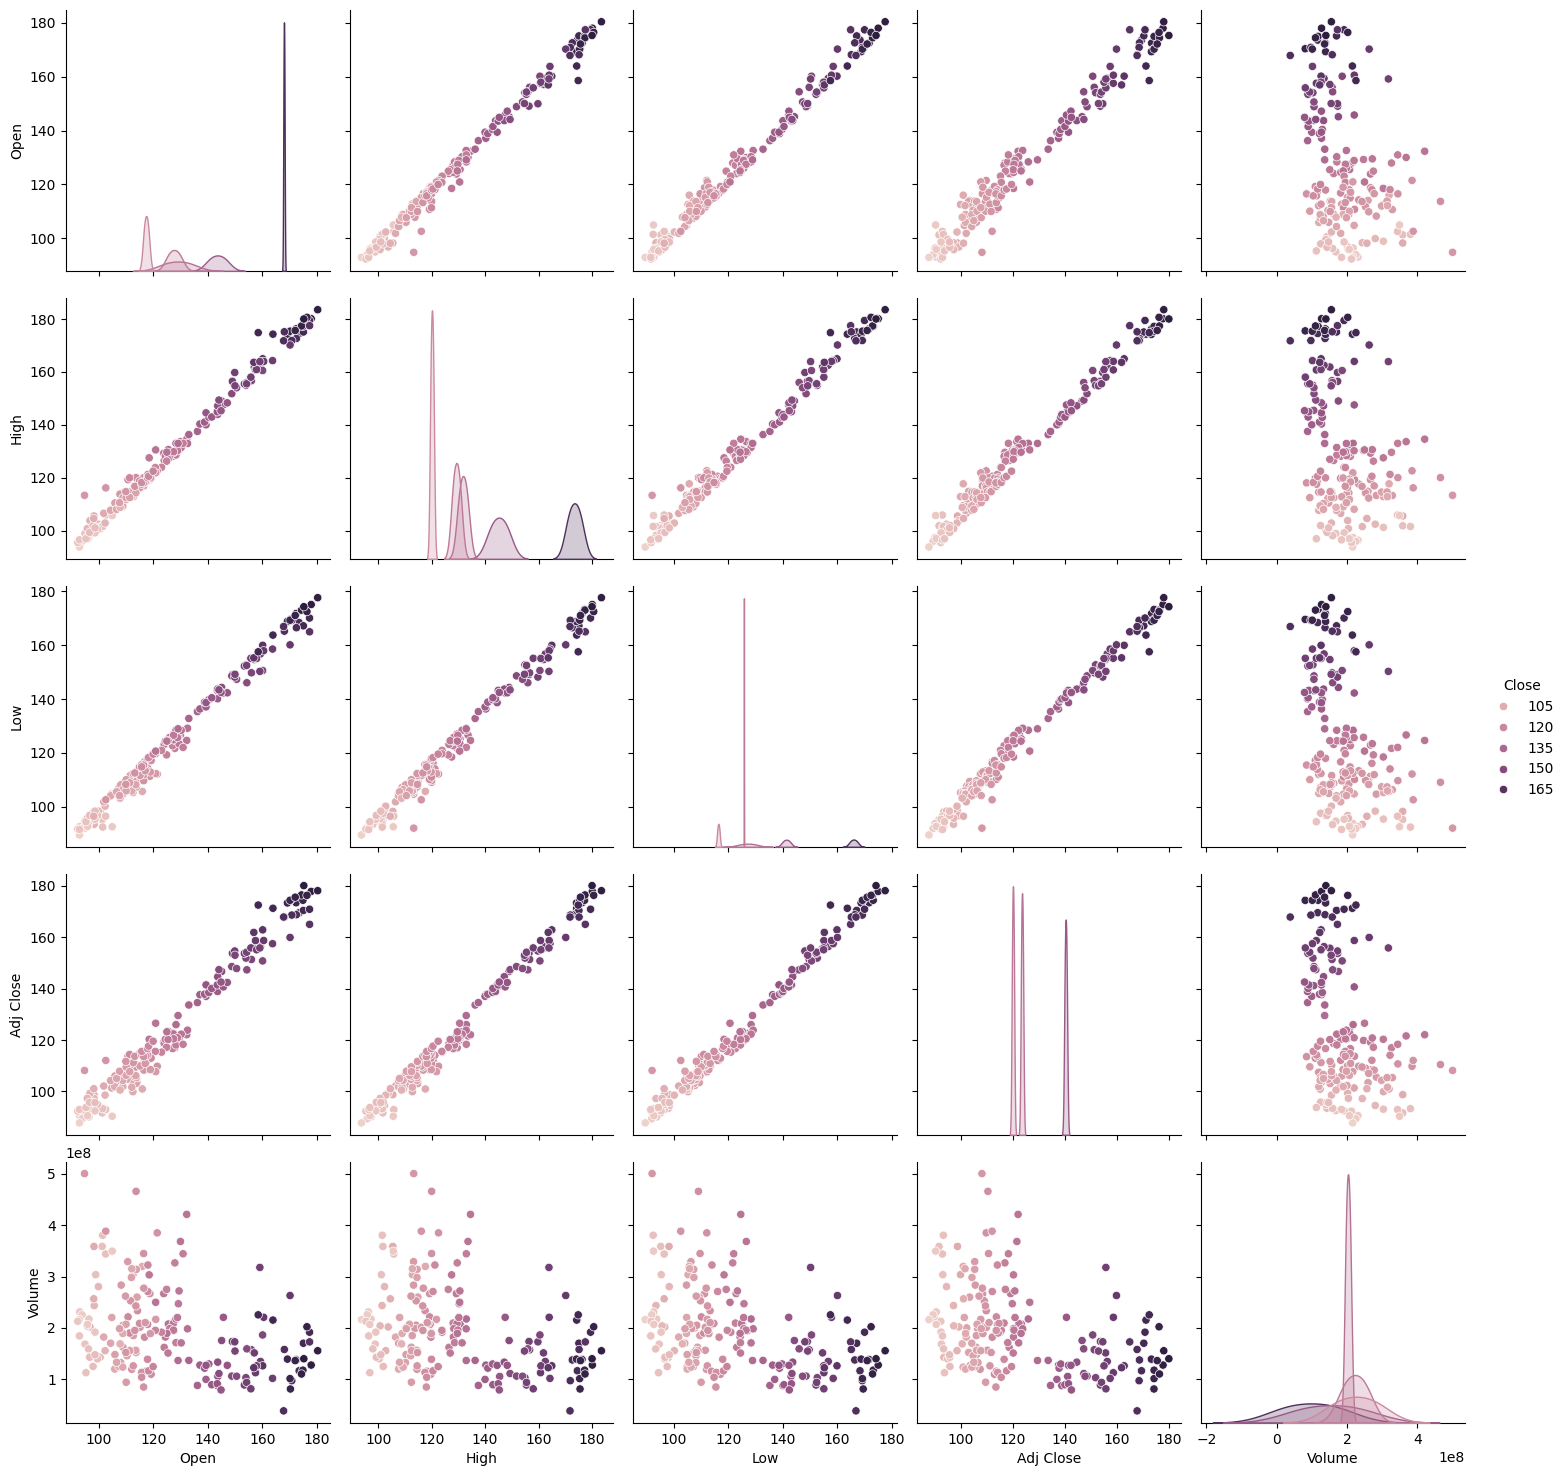

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
sns.pairplot(df,hue="Close",height=3)


<Axes: xlabel='Close', ylabel='Count'>

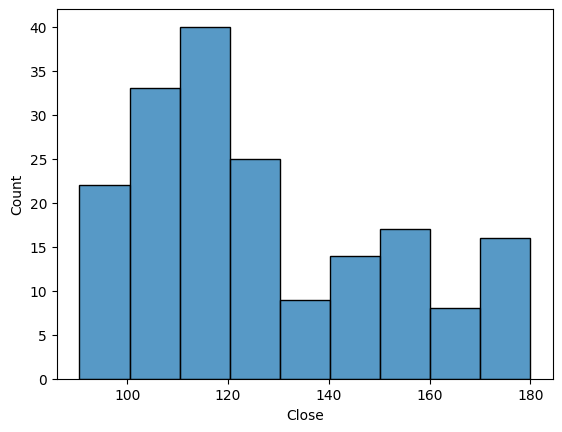

In [ ]:
sns.histplot(df['Close'])

<Axes: xlabel='Open', ylabel='Count'>

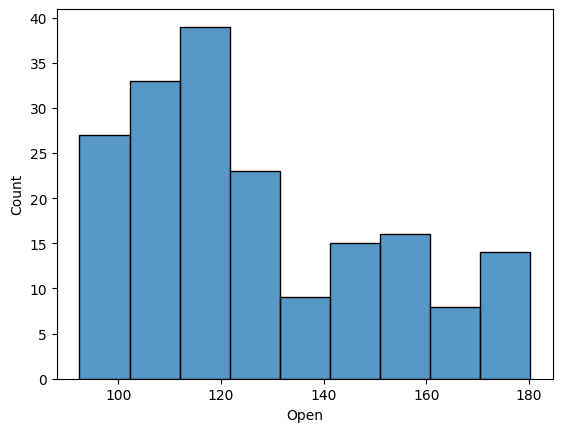

In [ ]:
sns.histplot(df['Open'])

<Axes: xlabel='High', ylabel='Count'>

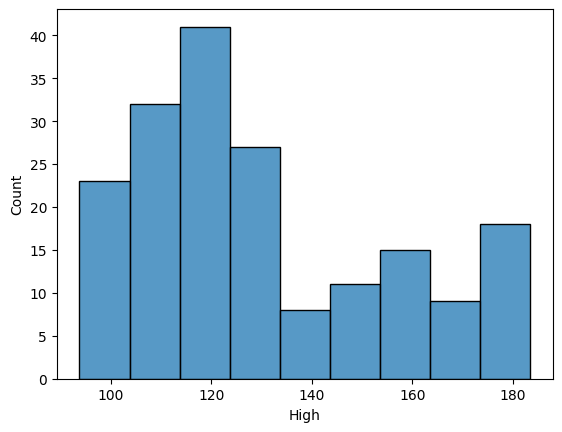

In [ ]:
sns.histplot(df['High'])

<Axes: xlabel='Low', ylabel='Count'>

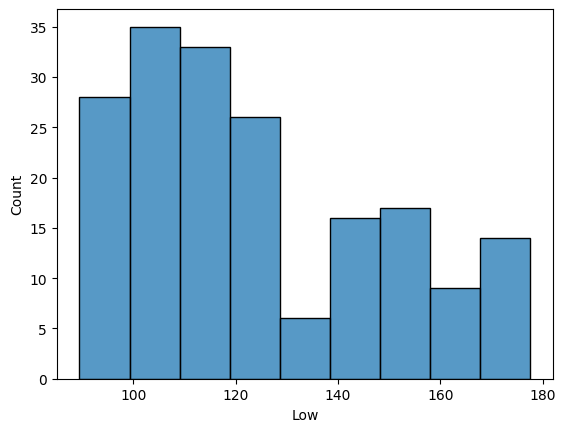

In [ ]:
sns.histplot(df['Low'])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with historical stock data
# Features could include 'Open', 'High', 'Low', 'Volume', etc.

# Example features
features = ['Open', 'High', 'Low', 'Volume']

# Use the last column (e.g., 'Close') as the target variable
target = 'Close'

# Prepare the feature matrix (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2.2798262916563043


# New Section